## 선형 회귀
* 데이터들 사이의 상관관계 또는 추이를 예측하거나, 대상 값 자체를 예측하는 지도학습 알고리즘
* 예를 들어, 방의 개수와 집값의 상관 관계 또는
* 과거 10년간의 영업 실적을 분석하여 미래의 영업 실적을 예측하는 것
* 하나의 종속변수와 하나 이상의 독립변수 간의 상관관계를 기본으로 하여
* 하나의 n차 선형방정식으로 변수 관계를 일반화하는 분석방법

## 선형성(Linearity)
* 두 변수의 관계가 하나의 직선의 형태로 설명될 수 있는 관계를 지닌다는 것
* 하나의 독립변수를 통해 종속변수 값을 잘 설명할 수 있으면 단순 선형회귀라 하고
* 둘 이상의 독립변수를 통해 종속변수 값을 잘 설명할 수 있으면 다중 선형회귀라 함
* 회귀분석의 중요 개념
* $ \hat y = ax + b + \epsilon $
* 선형방정식 : 두 변수의 관계를 방정식으로 표현
* 기울기( $a$ ) : 독립변수가 종속변수에 얼마나 영향을 주는지 그 크기와 방향을 파악
* 절편( $b$ ) : 회귀선을 얼마나 위/아래로 평행이동시키는지 알수 있음

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
## 공부한 시간 대비 성적 예측을 단순선형회귀로 풀어보자
time = [2,4,6,8]
jumsu = [81,93,91,97]

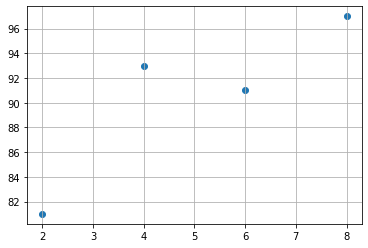

In [8]:
plt.scatter(time,jumsu)
plt.grid()

## 최소제곱법OLS

* 선형방정식의 회귀계수를 구하는 일반적인 방법

* $ a = \frac {\sum (x - \bar x)(y - \bar y) } {\sum (x - \bar x) ^ 2}  $

* $ b = \bar y - (a \cdot \bar x) $

In [9]:
# 각 변수의 평균 구해보자
tmean = np.mean(time)
jmean = np.mean(jumsu)
print(tmean, jmean)

5.0 90.5


In [10]:
# 기울기를 구하는 식 중 분자에 해당하는 수식을 함수로 정의
def divtop(x, xmean, y, ymean):
    sums = 0
    for i in range(len(x)):
        sums += (x[i] - xmean) * (y[i] - ymean)
    return sums

In [13]:
# 기울기를 구하는 공식에서 분자와 분모부분을 각각 구한다.
dividen = divtop(time, tmean, jumsu, jmean)
divsor = sum([(t - tmean)**2 for t in time ])

In [12]:
# 기울기와 절편 계산 
a = dividen / divsor
b = jmean - (a*tmean)
print(a,b)

2.3 79.0


In [16]:
## 예측값을 넣어 회귀선을 그려봄
# 구해진 선형방정식(y=2.3x+79)에 x값을 넣어 예측값 산출
z = [(a * t + b) for t in time]
z

[83.6, 88.2, 92.8, 97.4]

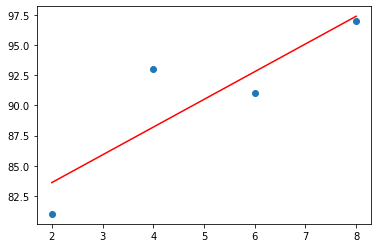

In [17]:
# 실제값과 예측선을 시각화
plt.scatter(time,jumsu)
plt.plot(time, z, 'r')

## 평균제곱근 오차RMSE
* 최소제곱법을 이용해서 회귀직선을 그어 보았지만 다양한 상황에 적합한 직선을 긋기에는 부족
* 즉, 여러 개의 독립변수로 구성된 데이터에 대한 회귀직선을 긋기에는 무리가 있음
* 따라서, 여러 독립변수로 구성된 데이터의 경우 임의의 선을 그린 후 이 선의 오차를 평가하고 조금씩 수정해 나가는 방법이 필요
    + 주어진 선의 오차를 평가하는 방법 : 평균제곱근오차
    + (실제값 - 예측값)의 제곱합 나누기 데이터갯수의 제곱근
    + $ \sqrt {\frac {\sum (y - \hat y)^2} {n}} $
* 최소제곱법에서는 공식을 이용해서 바로 기울기/절편 계산
* 한편, 평균제곱근오차에서는 **기울기와 절편에 아무값이나 대입**하고 오차를 구해서 이 **오차가 최소화하는 방식**을 사용

In [19]:
from sklearn.metrics import mean_squared_error

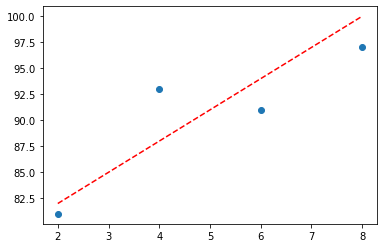

In [23]:
# 시도1 -> 기울기 : 3, 절편 : 76
a = 3; b = 76
z = [ (a * t + b) for t in time]
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

In [24]:
MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

3.3166247903554

6.855654600401044

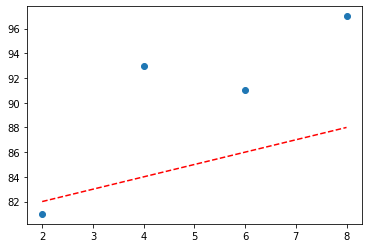

In [31]:
# 시도2 -> 기울기 : 3, 절편 : 70
a = 1; b = 80
z = [ (a * t + b) for t in time]
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

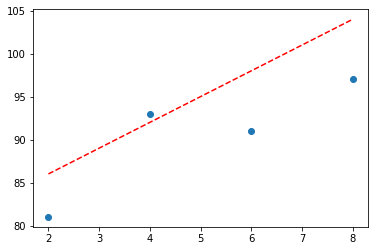

In [26]:
# 시도3 -> 기울기 : 3, 절편 : 80
a = 3; b = 80
z = [ (a * t + b) for t in time]
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

In [27]:
MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

5.5677643628300215

6.4031242374328485

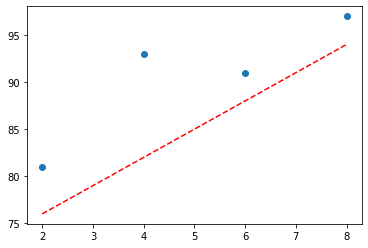

In [28]:
# 시도4 -> 기울기 : 3, 절편 : 70
a = 3; b = 70
z = [ (a * t + b) for t in time]
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

12.449899597988733

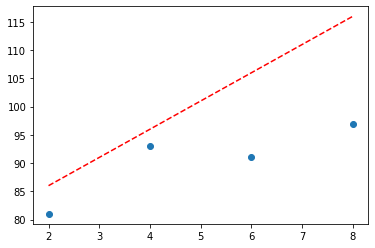

In [29]:
# 시도4 -> 기울기 : 3, 절편 : 70
a = 5; b = 76
z = [ (a * t + b) for t in time]
plt.scatter(time, jumsu)
plt.plot(time, z, 'r--')

MSE = mean_squared_error(jumsu, z)
np.sqrt(MSE)

## 결론 
* 기울기가 커지면 (3 -> 5) 오차가 증가(3.31 -> 12.45)
* 기울기가 작아지면 (3 -> 1) 오차가 증가(3.31 -> 10.34)
* **즉, 기울기와 오차간의 상관관계가 존재**

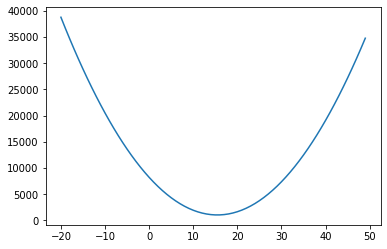

In [37]:
# 기울기의 변화에 따른 오차의 변화를 시각화
weight = []   # 기울기
loss = []     # 오차
b = 0         # 절편은 편의상 0

for w in range(-20, 50):   # 기울기를 -20~50으로 설정 
    z = [w * v + b for v in time]   # 예측값
    weight.append(w)
    loss.append(mean_squared_error(jumsu, z))  # 오차 계산
    
plt.plot(weight, loss)
plt.show()

## 기울기와 오차의 관계
* 그래프에서 확인하듯이 기울기와 오차의 관계는 이차함수 형태임
* 오차가 가장 작은 부분은?
    + 그래프 하단의 볼록한 부분
    
## 기울기를 구하는 방법
* 임의의 점을 선택 -> 미분 실시 -> 기울기가 0 인지 확인
* 기울기가 0일때까지 계속 반복 시행
* 미분의 기울기를 이용한 **경사하강법**을 적용

In [145]:
# 선형 회귀를 이용한 보스턴 집값 예츨
# 1978년 보스턴 주택 가격
# 506개 타운의 주택 가격 중앙값(담위 1,000달러)

from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


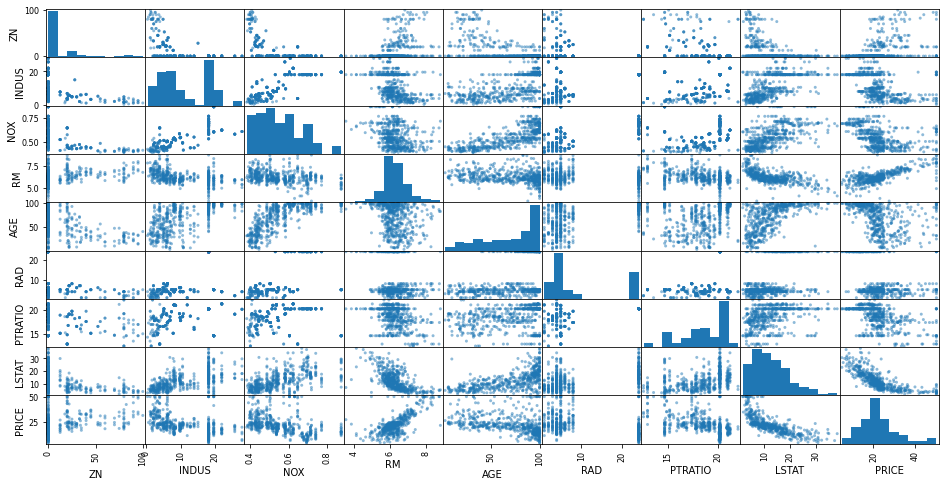

In [146]:
# 산점도 행렬
from pandas.plotting import scatter_matrix

# ZN,INDUS,NOX,RM,AGE,RAD,PTRATIO, LSTAT, PRICE
sm = df.iloc[:,[1,2,4,5,6,8,10,12,13]]
# plt.figure(figsize=(20,20))
scatter_matrix(sm, figsize=(16,8))
plt.show()

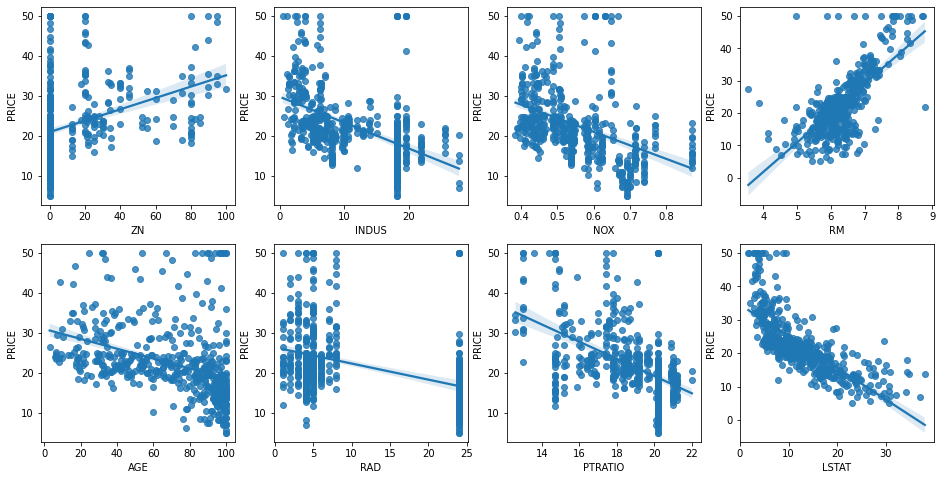

In [147]:
# 각 독립 변수에 종속변수를 이용해서 회귀선을 그려보기
import seaborn as sns

features = ['ZN','INDUS','NOX','RM','AGE','RAD','PTRATIO','LSTAT']
fig, ax = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

for i, feature in enumerate(features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax=ax[row][col])
plt.show()    


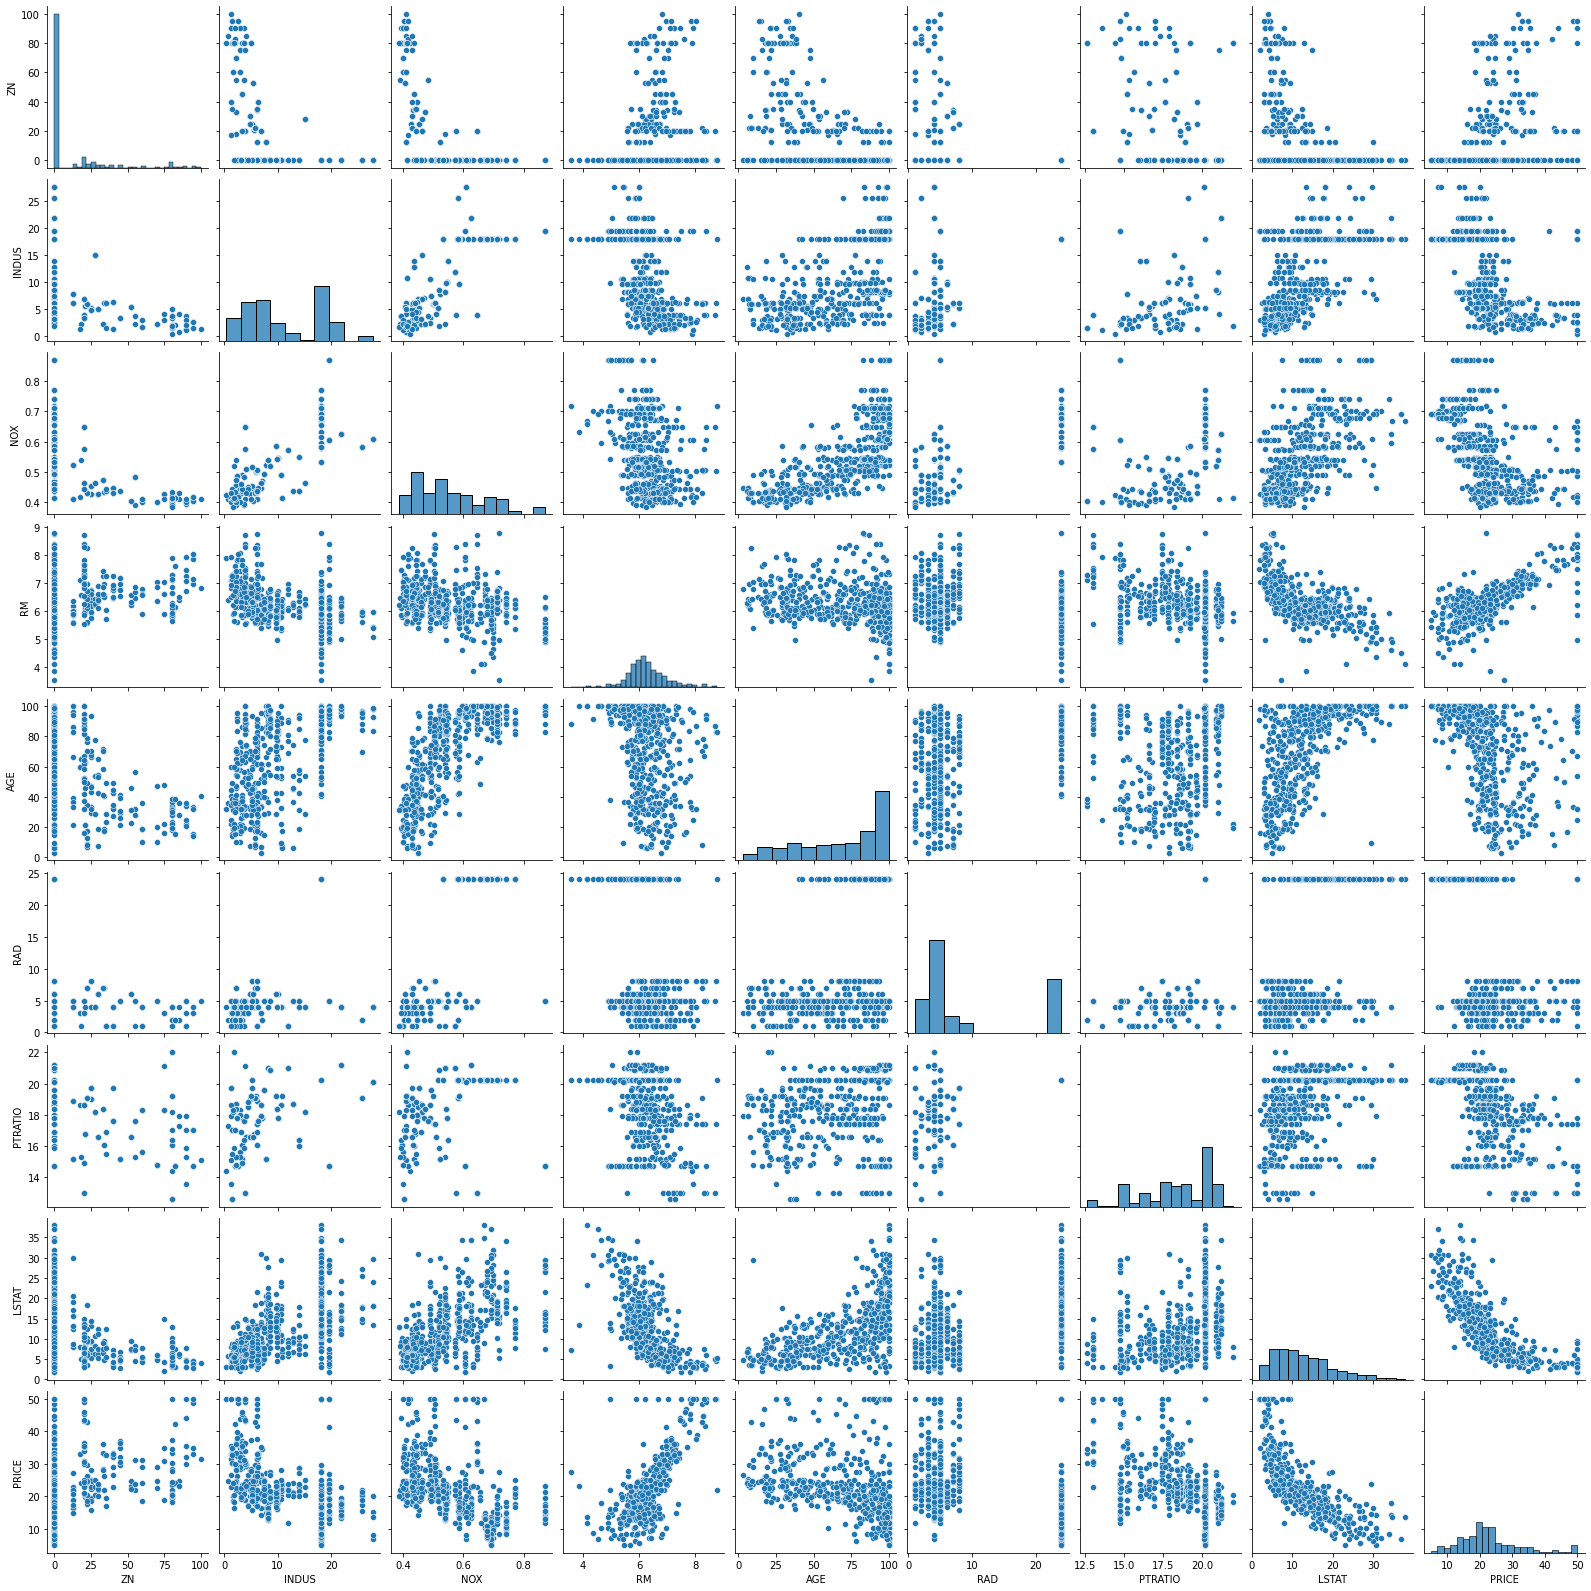

In [148]:
# seaborn 산점도 행렬
features.append('PRICE')
sns.pairplot(df[features])
plt.show()

In [149]:
# # seaborn 산점도 행렬
# features.append('PRICE')
# sns.pairplot(df[features], height=0.7)
# plt.show()

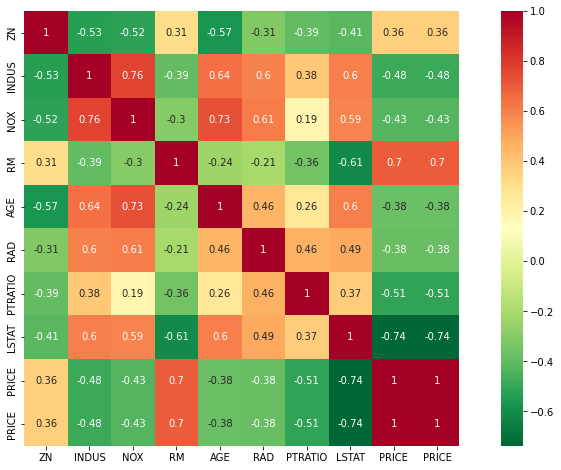

In [53]:
# 상관계수 행렬
cm = np.corrcoef(df[features].values.T)
plt.figure(figsize=(15,8))
hm = sns.heatmap(cm, cmap='RdYlGn_r',cbar = True, annot=True, square = True, xticklabels=features, yticklabels=features)

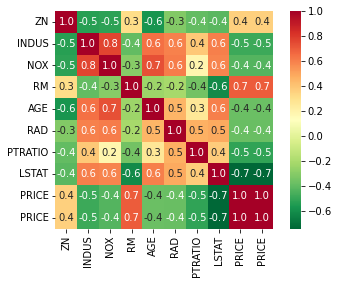

In [54]:
# cmap : 히트맵 색상 변경
# annot : 히트맵에 상관계수 출력 여부 지정
# fmt : 상관계수 출력시 자릿수 지정
# ticklabels : 히트맵 축 레이블 출력시 컬럼명 지정
# cbar, square : 컬러맵 막대 표시여부, 히트맵 출력 모양 지정

hm = sns.heatmap(cm, cmap='RdYlGn_r', cbar= True, annot=True, square=True, fmt='.1f', 
                xticklabels=features, yticklabels=features)

## 경사하강법gradient descent
* 머신러닝 및 딥러닝 알고리즘을 학습시킬때 사용하는 방법
* 실제값과 예측값의 오차가 손실함수(Loss Function) 라 함
* 즉, 이 손실 함수가 0에 가깝게 줄어들게 만드는 것이 학습의 목표
* 이 오차를 비용이라고 판단하여, 비용함수(Cost Funtion) 라고도 함
* 손실함수의 최소값을 찾기 위해, 임의의 가중치를 설정하고 그 점에서 미분(기울기)을 계산하고,
* 이 값이 적합한지 계속 탐색하는 과정을 반복
* 앞이 보이지 않는 안개가 낀 산을 내려올 때는 모든 방향으로 산을 더듬어가며 산의 높이가 가장 낮아지는 방향으로 한 발씩 내딛어갈 수 있다
* 우리가 주로 실제 분석에서 맞딱드리게 되는 손실함수들은 형태가 복잡해 (가령, 비선형함수) 미분계수와 그 근을 계산하기 어려운 경우가 많고,
* 실제 미분계수를 계산하는 과정을 컴퓨터로 구현하는 것이 어렵기 때문에 경사하강법을 사용함

## 경사 하강법의 한계점
* 실제 손실함수는 저렇게 깔끔한 이차 함수 형태를 띄지 않음
* 복잡한 형태의 다차 함수를 띔
* 데이터셋이 많아지면, 당연히 계산량도 무지막지하게 많아짐
* 그로 인해 학습 속도가 매우 느려짐
* 랜덤 하게 선택된 가중치가 지역최소해Local minimum에 수렴해버리면, 실제 목표인 전역최소해Global minimum을 찾지 못하는 문제가 발생할 수 있음
* 손실함수의 모양이 전반적으로 곡선이더라도, 이 곡선 안에 평탄한 영역plateau이 존재할 수도 있음
* 이 영역에서는 학습속도가 매우 느려짐
* 더이상 학습이 진행되지 않는 가중치 소실 문제 발생
* 데이터의 형태에 따라 SGD, Adam, Momentum, Adagrad 등을 선택적으로 사용

In [76]:
# 회귀분석 실시
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Xtrain, Xtest, ytrain, ytest = train_test_split(boston.data, boston.target, train_size=0.7, random_state=2111081145)

lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)

pred = lrclf.predict(Xtest)

np.set_printoptions(precision=2)
print('기울기', lrclf.coef_)
print('절편', np.round(lrclf.intercept_, 2))

기울기 [-1.12e-01  4.77e-02  5.77e-02  1.04e+00 -1.67e+01  4.45e+00 -6.38e-03
 -1.34e+00  3.03e-01 -1.33e-02 -8.50e-01  8.76e-03 -4.47e-01]
절편 29.15


In [70]:
## 공부한 시간 대비 성적 예측을 LinearRegression로 풀어 보자
Xtrain, Xtest, ytrain, ytest = train_test_split(pd.DataFrame(time), jumsu, train_size=0.9, random_state=2111081145)

lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

print('기울기', lrclf.coef_)
print('절편', np.round(lrclf.intercept_,2))


기울기 [1.]
절편 87.67


In [73]:
# train/test 없이 바로 테스트
# reshape(-1, 1) : 행 우선(가로) 데이터를 열 우선(세로 데이터로 변경)
lrclf = LinearRegression()
lrclf.fit(np.array(time).reshape(-1,1), jumsu)

print('기울기', lrclf.coef_)
print('절편', np.round(lrclf.intercept_,2))

기울기 [2.3]
절편 79.0


In [79]:
# 선형회귀 모델 평가 : R^2, RMSE
mse = mean_squared_error(ytest, pred)
print(np.sqrt(mse))
print(r2_score(ytest, pred))

5.330801796388731
0.7213397671299536


In [84]:
## 공부한 시간 대비 성적 예측을 statsmodels의 OLS로 풀어봄
# ! pip install statsmodels

import statsmodels.api as sm

df = pd.DataFrame({'time':time, 'jumsu':jumsu})
df.head()

,time,jumsu
0,2,81
1,4,93
2,6,91
3,8,97


In [89]:
# OLS(종속변수, 독립변수, 옵션)
df['intercept'] = 1   # 절편추가
lm = sm.OLS(df.jumsu, df[['time','intercept']])
result = lm.fit()
result.summary()

/home/hadoop/.local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  jumsu   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     6.373
Date:                Mon, 08 Nov 2021   Prob (F-statistic):              0.128
Time:                        12:46:39   Log-Likelihood:                -9.9083
No. Observations:                   4   AIC:                             23.82
Df Residuals:                       2   BIC:                             22.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time           2.3000      0.911      2.525      0.128      -1.620       6.220
intercept     79.0000      4.990     15.832      0.004      57.530     100.470
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.020
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.679
Skew:                           0.911   Prob(JB):                        0.712
Kurtosis:                       2.130   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# 배달 정보가 담긴 데이터가 다음과 같을때
# 회귀분석을 이용해서 회귀계수가 /R^2를 구하고
# 배달거리가 200m라면 배달시간은 얼마인지 예측

baedal = pd.read_csv('csv/delivery.txt', header=None)
baedal.columns = ['dist','time']
baedal.head()

,dist,time
0,100,20
1,150,24
2,300,36
3,400,47
4,130,22


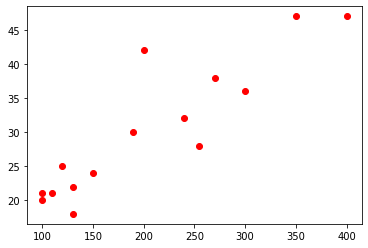

In [95]:
plt.plot(baedal.dist, baedal.time, 'ro')
plt.show()

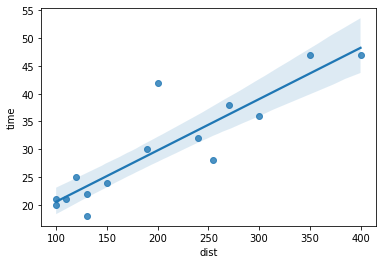

In [97]:
sns.regplot(data=baedal, x='dist', y='time')
plt.show()

In [99]:
baedal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dist    15 non-null     int64
 1   time    15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [101]:
baedal.describe()

,dist,time
count,15.000000,15.000000
mean,203.000000,30.066667
std,95.912907,9.859489
min,100.000000,18.000000
25%,125.000000,21.500000
50%,190.000000,28.000000
75%,262.500000,37.000000
max,400.000000,47.000000


In [115]:
Xtrain, Xtest, ytrain, ytest = train_test_split( np.array(baedal.dist).reshape(-1,1), baedal.time,
                                                train_size = 0.9, random_state=2111081445)

lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

print( '%.2f'%lrclf.coef_[0], '%.2f'% lrclf.intercept_)

0.09 11.99


In [114]:
rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print('%.2f'%rmse, '%.2f'%r2)

3.10 0.94


In [118]:
lrclf.predict(np.array([ [200] ]))

array([29.5])

In [119]:
# 흡연여부와 임신주차에 따른 신생아 몸무게 측정
# 37/40 주차, 흡연일때 몸무게와 42주차, 금연일때 몸무게는 ?

pg = pd.read_csv('csv/pregnant.txt', sep='\t')
pg.head()

,Wgt,Week,Smoke
0,2940,38,yes
1,3130,38,no
2,2420,36,yes
3,2450,34,no
4,2760,39,yes


In [122]:
# 레이블 인코딩 1 = LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(pg.Smoke)
pg['smoke1'] = encoder.transform(pg.Smoke)
pg.iloc[:, [2,3]]

,Smoke,smoke1
0,yes,1
1,no,0
2,yes,1
3,no,0
4,yes,1
5,yes,1
6,no,0
7,yes,1
8,no,0
9,no,0


In [150]:
# 레이블 인코딩 2 - lambda function
pg['smoke2'] = pg.Smoke.apply(lambda x: 0 if x == 'no' else 1)
pg.iloc[:, [2,4]].head()

,Smoke,smoke3
0,yes,1
1,no,0
2,yes,1
3,no,0
4,yes,1


In [151]:
# 레이블 인코딩 3 - pandas의 categorical 함수 
# Categorical를 이용해서 범주형 변수로 변환
# pd.Categorical('pg.Smoke')
# pg.Smoke.astype('category')

pg['smoke3'] = pd.Categorical(pg.Smoke)



In [152]:
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Wgt     32 non-null     int64   
 1   Week    32 non-null     int64   
 2   Smoke   32 non-null     object  
 3   smoke1  32 non-null     int64   
 4   smoke3  32 non-null     category
 5   smoke2  32 non-null     int64   
dtypes: category(1), int64(4), object(1)
memory usage: 1.5+ KB


In [153]:
# Series 객체에서 지원하는 cat.codes를 이용해서 category별 인코딩값 확인
pg['smoke3'] = pg.smoke3.cat.codes

<AxesSubplot:xlabel='smoke3', ylabel='Wgt'>

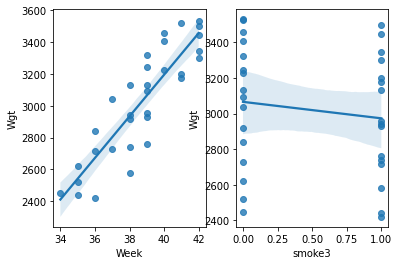

In [154]:
# 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.regplot(x='Week', y='Wgt', data=pg, ax=ax1)
sns.regplot(x='smoke3', y='Wgt', data=pg, ax=ax2)

<AxesSubplot:xlabel='Week', ylabel='Wgt'>

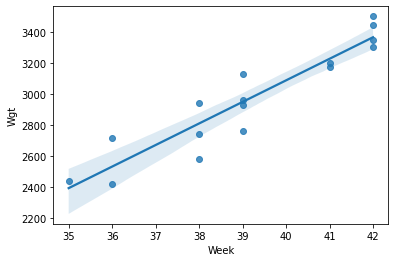

In [160]:
# 흡연하는 산모
sp = pg.loc[pg.smoke3 == 1, ['Week','Wgt']]
sns.regplot(x='Week', y='Wgt', data=sp)

In [165]:
# 흡연하는 산모 회귀분석
Xtrain, Xtest, ytrain, ytest = train_test_split(np.array(sp.Week).reshape(-1,1), sp.Wgt,
                                                train_size = 0.9, random_state=2111081545)

lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

print('%.2f' % lrclf.coef_[0], '%.2f' % lrclf.intercept_)

rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)

print('%.2f' % rmse, '%.2f' % r2)

139.81 -2502.13
23.00 0.99


<AxesSubplot:xlabel='Week', ylabel='Wgt'>

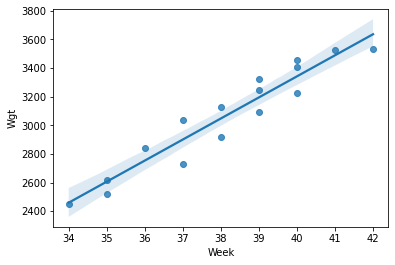

In [162]:
# 흡연하지않는 산모
nsp = pg.loc[pg.smoke3 == 0, ['Week','Wgt']]
sns.regplot(x='Week', y='Wgt', data=nsp)

In [168]:
# 흡연하는 산모 회귀분석
Xtrain, Xtest, ytrain, ytest = train_test_split(np.array(nsp.Week).reshape(-1,1), nsp.Wgt,
                                                train_size = 0.9, random_state=2111081545)

lrclf = LinearRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

print('%.2f' % lrclf.coef_[0], '%.2f' % lrclf.intercept_)

rmse = np.sqrt(mean_squared_error(ytest, pred))
r2 = r2_score(ytest, pred)
print('%.2f' % rmse, '%.2f' % r2)

139.89 -2268.77
120.41 0.93


In [90]:
# sklearn패키지의 diabetes 데이터 셋
# diabetes : 당뇨병 환자의 혈압, 몸무게, 혈당, 키 등등으로 구성
# 당뇨병 환자의 1년 후 진전된 상황 예측하는 모델을 작성해 보자